In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from collections import OrderedDict

In [2]:
channels = [
    "CNN-News18",
    "Republic World",
    "India Today",
    "MIRROR NOW",
    "TIMES NOW",
    "DD INDIA",
    "WION",
    "NewsX",
]

In [3]:
df = pd.read_csv("Filtered_labelled_ge_transcripts (1).csv")

In [4]:
df

,Unnamed: 0,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
0,0,joLk0IPEniA,WILL RAFALE BE A FACTOR THIS ELECTION? | FACEO...,"RafaleTwist DAY BEFORE POLLS, RAFALE BLOW TO G...",2019-04-10T16:41:10Z,CNN-News18,https://i.ytimg.com/vi/joLk0IPEniA/hqdefault.jpg,unanimously rejected government's contention o...,True,en,470,8,5.0,unanimously reject government \n contention ...,Hindu -> NORP\ntoday -> DATE\nSupreme Court ->...,ProGov
1,1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...,ProGov
2,2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...,ProGov
3,3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...,AntiGov
4,4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1363,V1pyuUKGEvw,"CBI Selection Panel To Meet On 24th January, 2019",Republic TV is India's no.1 English news chann...,2019-01-16T12:14:38Z,Republic World,https://i.ytimg.com/vi/V1pyuUKGEvw/hqdefault.jpg,breaking news coming far entire internal battl...,True,en,361,0,4.0,breaking news come far \n entire internal ba...,CBI -> ORG\nCBI -> ORG\nAlok Varma -> PERSON\n...,Neutral
1260,1364,qx0a2coAYz4,Church Body&#39;s Letter Accessed By Republic ...,Republic TV is India's no.1 English news chann...,2019-01-16T11:29:33Z,Republic World,https://i.ytimg.com/vi/qx0a2coAYz4/hqdefault.jpg,Oh leave convent editor dungeon fact official ...,True,en,705,6,19.0,oh leave convent editor \n dungeon fact offi...,Jesus -> PERSON\nAlfea -> PERSON\nJesus -> PER...,Neutral
1261,1365,OVUMiE3tCc8,Four Nuns Who Spoke Against Franco Mulakkal Sh...,Republic TV is India's no.1 English news chann...,2019-01-16T11:15:26Z,Republic World,https://i.ytimg.com/vi/OVUMiE3tCc8/hqdefault.jpg,pull away uh breaking update Santa Fe's gettin...,True,en,16305,47,104.0,pull away uh break \n update Santa Fe gettin...,Santa Fe -> ORG\nFranco -> PERSON\nKerala -> G...,AntiGov
1262,1366,mF09iL30OCY,"After Being Dumped By SP-BSP, Rahul Gandhi For...",Republic TV is India's no.1 English news chann...,2019-01-15T06:14:38Z,Republic World,https://i.ytimg.com/vi/mF09iL30OCY/hqdefault.jpg,let's quickly turn attention Congress party sn...,True,en,364,3,6.0,let quickly turn attention \n Congress party...,Congress -> ORG\nAkhilesh Yadav -> PERSON\nnot...,Neutral


In [5]:
df["channel"] = df["channel"].apply(lambda x: "DD INDIA" if x == "S1mple" else x)

In [6]:
df["Label"].value_counts()

Label
Neutral    598
ProGov     576
AntiGov     90
Name: count, dtype: int64

In [7]:
categorical_label = pd.Series(df["Label"], dtype="category")
categorical_channels = [channels.index(a) for a in df["channel"]]

(array([576.,   0.,   0.,   0.,   0.,  90.,   0.,   0.,   0., 598.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

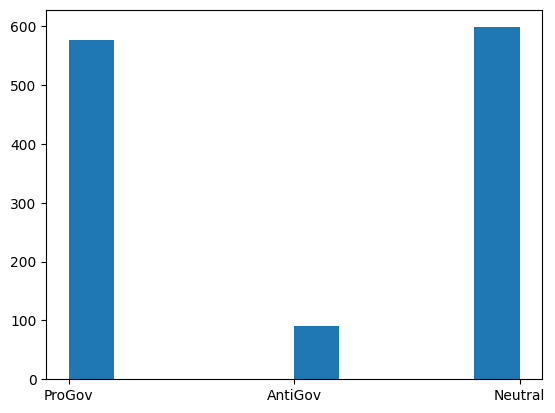

In [8]:
plt.hist(categorical_label)

In [9]:
df["channel"].value_counts()

channel
WION              310
MIRROR NOW        204
India Today       168
DD INDIA          127
Republic World    124
NewsX             119
TIMES NOW         107
CNN-News18        105
Name: count, dtype: int64

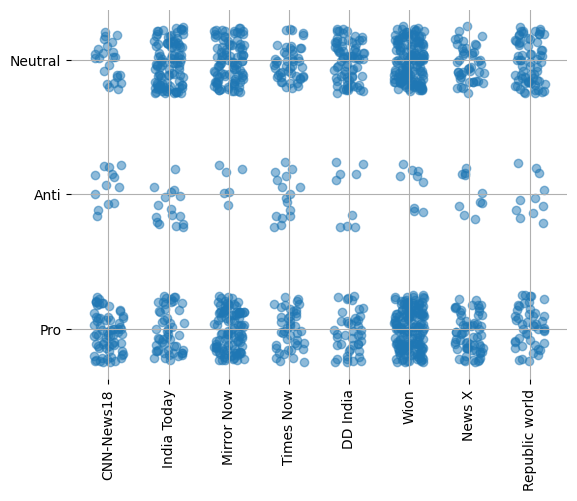

In [10]:
new = df.copy()
new["Label"] = pd.factorize(df['Label'])[0] + 1
new["channel"] = pd.factorize(df['channel'])[0] + 1

xnoise, ynoise = np.random.random(len(df))/2, np.random.random(len(df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(new["channel"].apply(lambda x: float(x))+xnoise, new["Label"].apply(lambda x: float(x))+ynoise, alpha=0.5)
# You can also set xticks and yticks to be your category names:
plt.xticks([1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25], ["CNN-News18", "India Today", "Mirror Now", "Times Now", "DD India", "Wion", "News X", "Republic world"], rotation = 90) # The reason the xticks start at 0.25
plt.yticks([1.25, 2.25, 3.25], ["Pro", "Anti", "Neutral"])

plt.grid()
sns.despine(left=True, bottom=True)

<Axes: xlabel='Label', ylabel='count'>

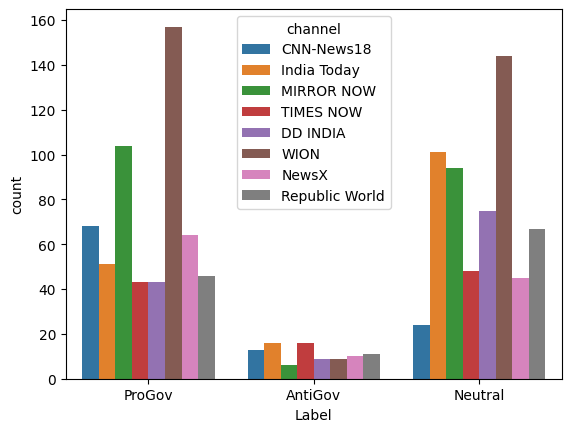

In [11]:
sns.countplot(x='Label', hue="channel", data=df)

<Axes: xlabel='Label', ylabel='likes'>

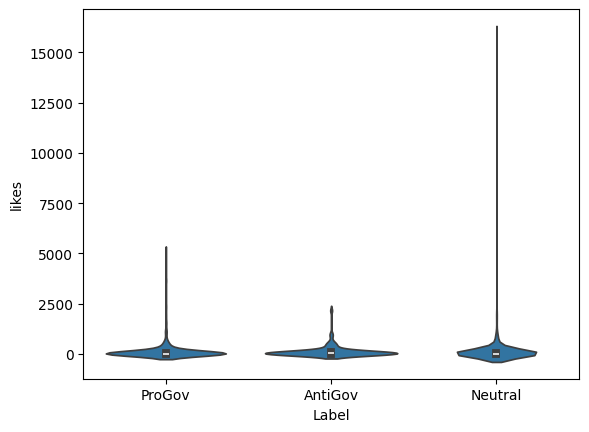

In [12]:
sns.violinplot(x="Label", y="likes", data=df)

<Axes: xlabel='Label', ylabel='comments'>

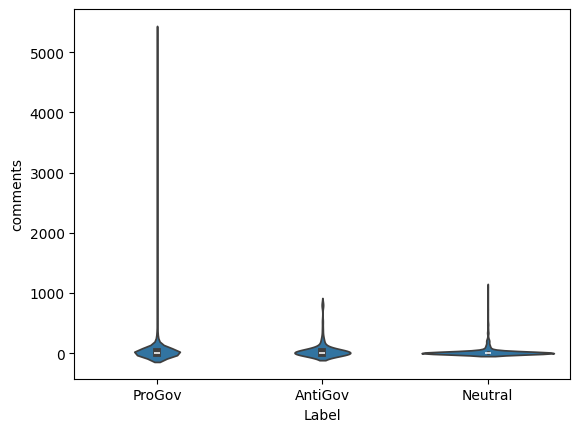

In [13]:
sns.violinplot(x="Label", y="comments", data=df)

<Axes: xlabel='Label', ylabel='views'>

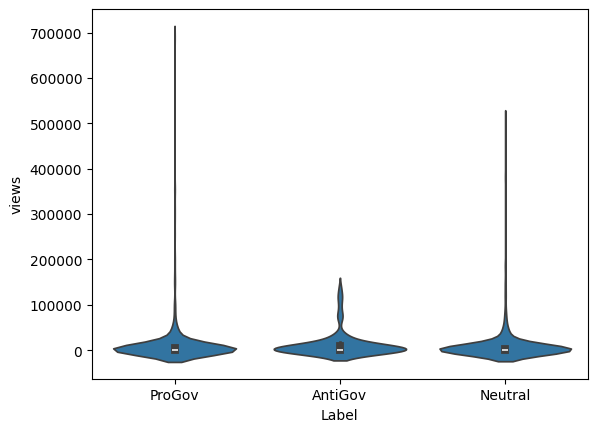

In [14]:
sns.violinplot(x="Label", y="views", data=df)

In [15]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df["published_at"]]
vid_freq = {}
for _, row in df.iterrows():
    if row["published_at"].split("T")[0] in vid_freq:
        vid_freq[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq[row["published_at"].split("T")[0]] = 1

In [16]:
ordered = OrderedDict(sorted(vid_freq.items(), key=lambda t: t[0]))

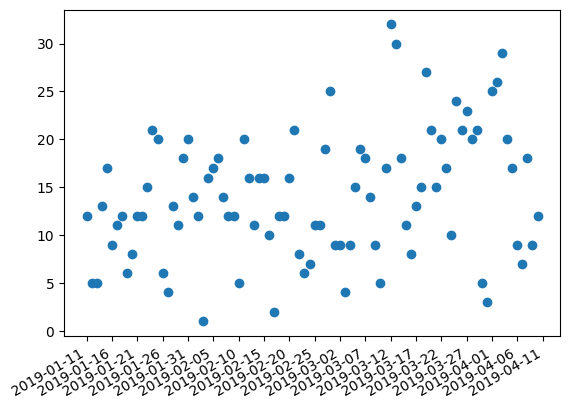

In [17]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.scatter([np.datetime64(x) for x in ordered.keys()], ordered.values())
plt.gcf().autofmt_xdate()

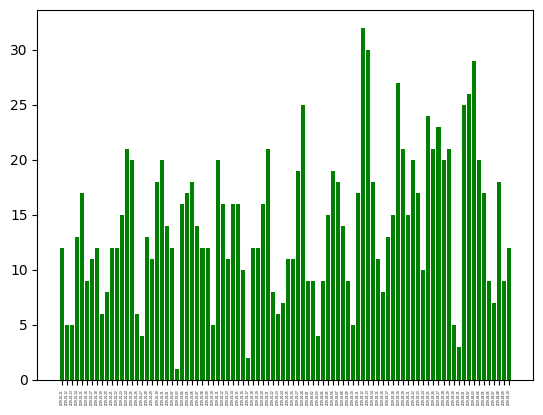

In [18]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered.keys(), ordered.values(), color='g');

In [19]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "Neutral"]["published_at"]]
vid_freq_neutral = {}
for _, row in df[df["Label"] == "Neutral"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_neutral:
        vid_freq_neutral[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_neutral[row["published_at"].split("T")[0]] = 1

In [20]:
ordered_neutral = OrderedDict(sorted(vid_freq_neutral.items(), key=lambda t: t[0]))

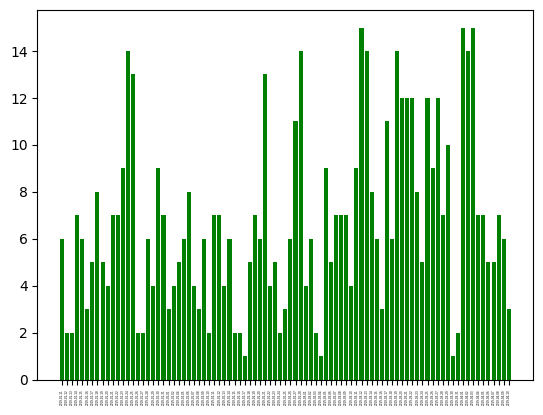

In [21]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered_neutral.keys(), ordered_neutral.values(), color='g');

In [22]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "ProGov"]["published_at"]]
vid_freq_pro = {}
for _, row in df[df["Label"] == "ProGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_pro:
        vid_freq_pro[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_pro[row["published_at"].split("T")[0]] = 1

In [23]:
ordered_pro = OrderedDict(sorted(vid_freq_pro.items(), key=lambda t: t[0]))

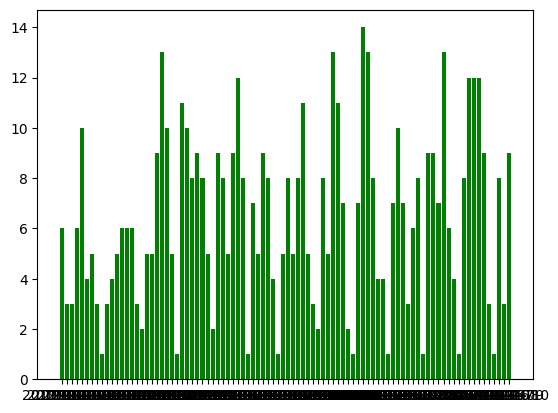

In [24]:
plt.bar(ordered_pro.keys(), ordered_pro.values(), color='g');

In [25]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "AntiGov"]["published_at"]]
vid_freq_anti = {}
for _, row in df[df["Label"] == "AntiGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_anti:
        vid_freq_anti[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_anti[row["published_at"].split("T")[0]] = 1

In [26]:
ordered_anti = OrderedDict(sorted(vid_freq_anti.items(), key=lambda t: t[0]))

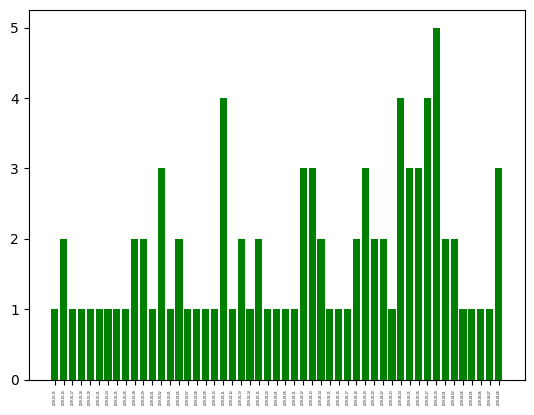

In [27]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered_anti.keys(), ordered_anti.values(), color='g');